<a href="https://colab.research.google.com/github/Eman-diab-hussein/deep/blob/main/eman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [116]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [154]:
data= pd.read_csv('/content/archive (7).zip')
df = pd.DataFrame(data)
df.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

In [ ]:
df.isna().sum()

CustomerID                     0
Churn                          0
MonthlyRevenue               156
MonthlyMinutes               156
TotalRecurringCharge         156
DirectorAssistedCalls        156
OverageMinutes               156
RoamingCalls                 156
PercChangeMinutes            367
PercChangeRevenues           367
DroppedCalls                   0
BlockedCalls                   0
UnansweredCalls                0
CustomerCareCalls              0
ThreewayCalls                  0
ReceivedCalls                  0
OutboundCalls                  0
InboundCalls                   0
PeakCallsInOut                 0
OffPeakCallsInOut              0
DroppedBlockedCalls            0
CallForwardingCalls            0
CallWaitingCalls               0
MonthsInService                0
UniqueSubs                     0
ActiveSubs                     0
ServiceArea                   24
Handsets                       1
HandsetModels                  1
CurrentEquipmentDays           1
AgeHH1    

In [171]:
df['ServiceArea'] = df['ServiceArea'].fillna(df['ServiceArea'].mode()[0])
df[['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues', 'AgeHH1', 'AgeHH2', 'Handsets', 'HandsetModels', 'CurrentEquipmentDays']] = df[['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues', 'AgeHH1', 'AgeHH2', 'Handsets', 'HandsetModels', 'CurrentEquipmentDays']].fillna(df[['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues', 'AgeHH1', 'AgeHH2', 'Handsets', 'HandsetModels', 'CurrentEquipmentDays']].median())

#Mode is used for categorical or discrete data
#median is commonly used for numerical data.

In [119]:
df.isna().sum()

CustomerID                   0
Churn                        0
MonthlyRevenue               0
MonthlyMinutes               0
TotalRecurringCharge         0
DirectorAssistedCalls        0
OverageMinutes               0
RoamingCalls                 0
PercChangeMinutes            0
PercChangeRevenues           0
DroppedCalls                 0
BlockedCalls                 0
UnansweredCalls              0
CustomerCareCalls            0
ThreewayCalls                0
ReceivedCalls                0
OutboundCalls                0
InboundCalls                 0
PeakCallsInOut               0
OffPeakCallsInOut            0
DroppedBlockedCalls          0
CallForwardingCalls          0
CallWaitingCalls             0
MonthsInService              0
UniqueSubs                   0
ActiveSubs                   0
ServiceArea                  0
Handsets                     0
HandsetModels                0
CurrentEquipmentDays         0
AgeHH1                       0
AgeHH2                       0
Children

In [120]:
#Show duplicated rows
df.duplicated().sum()

0

In [156]:
df = pd.get_dummies(df, columns=['HandsetPrice','MaritalStatus','PrizmCode','Occupation'])
# not have a specific order
#one-Hot Encoding can lead to a significant increase in the dimensionality

In [94]:
#df = df.drop(columns=['CustomerID'])

In [158]:
# prompt: lable encoding for more colomn with the same time
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for columns in ['Churn','ChildrenInHH','ServiceArea','HandsetRefurbished','HandsetWebCapable','TruckOwner','RVOwner','Homeownership','BuysViaMailOrder','RespondsToMailOffers','OptOutMailings','NonUSTravel','OwnsComputer','HasCreditCard','NewCellphoneUser','NotNewCellphoneUser','OwnsMotorcycle','MadeCallToRetentionTeam','CreditRating']:
    df[columns] = label_encoder.fit_transform(df[columns])


In [ ]:
df.info();

In [161]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

columns_to_normalize = ['PercChangeMinutes','PercChangeRevenues','MonthlyRevenue','MonthlyMinutes','TotalRecurringCharge','DirectorAssistedCalls','OverageMinutes','RoamingCalls','DroppedCalls','BlockedCalls','UnansweredCalls','CustomerCareCalls','ThreewayCalls','ReceivedCalls','OutboundCalls','InboundCalls','PeakCallsInOut','OffPeakCallsInOut','DroppedBlockedCalls','CallForwardingCalls','CallWaitingCalls','MonthsInService','UniqueSubs','ActiveSubs','Handsets','HandsetModels','CurrentEquipmentDays','AgeHH1','AgeHH2','RetentionCalls','RetentionOffersAccepted','ReferralsMadeBySubscriber','IncomeGroup','AdjustmentsToCreditRating']
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])


In [162]:
df['Churn'].value_counts()

Churn
0    36336
1    14711
Name: count, dtype: int64

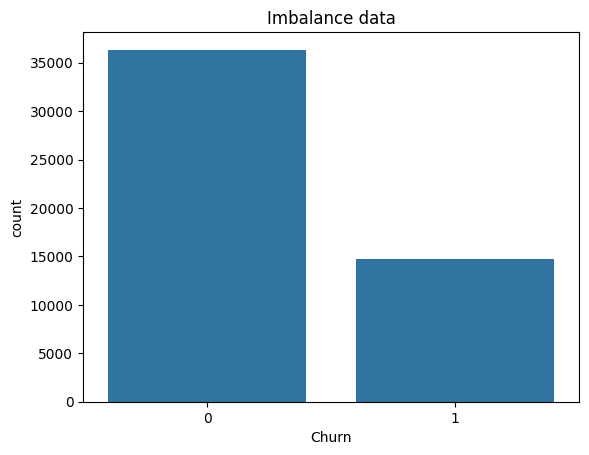

In [163]:
import seaborn as sns

sns.countplot(x='Churn', data=df)
plt.title("Imbalance data")
plt.show()

In [164]:
from sklearn.model_selection import train_test_split
y = df['Churn']
X = df.drop(columns=['Churn'])

In [165]:
from imblearn.over_sampling import SMOTE
import pandas as pd


# Define target number of samples for the minority class
target_class_os = 1
target_samples = 27000


current_majority_class_size = df[df['Churn'] == 0].shape[0]
current_minority_class_size = df[df['Churn'] == 1].shape[0]


samples_to_generate = target_samples - current_minority_class_size

smote = SMOTE(sampling_strategy={target_class_os: target_samples}, random_state=42)


X_resampled, y_resampled = smote.fit_resample(X, y)

print(f'New class distribution after resampling: {y_resampled.value_counts()}')


New class distribution after resampling: Churn
0    36336
1    27000
Name: count, dtype: int64


In [166]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42 )

In [147]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix, classification_report

from sklearn.ensemble import RandomForestClassifier

rfcla = RandomForestClassifier(n_estimators=100,random_state=9)
rfcla.fit(X_train, y_train)
y_pred = rfcla.predict(X_test)


print('Accuracy :', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall :', recall_score(y_test, y_pred))
print('F1-score :', f1_score(y_test, y_pred))
print('Confusion_matrix :',confusion_matrix(y_test, y_pred))

Accuracy : 0.7685384979737908
Precision: 0.9029608817808515
Recall : 0.514088839670235
F1-score : 0.6551670064293555
Confusion_matrix : [[10425   449]
 [ 3949  4178]]


In [104]:
from keras.layers import LSTM,Dense,Dropout
import tensorflow as tf
from tensorflow import keras
from keras import models,layers
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(64, activation='tanh'))
model.add(Dense(64, activation='tanh'))
model.add(Dense(64, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))



In [ ]:
Model2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 84, 64)            128       
                                                                 
 dense_33 (Dense)            (None, 84, 128)           8320      
                                                                 
 dense_34 (Dense)            (None, 84, 256)           33024     
                                                                 
 dense_35 (Dense)            (None, 84, 1)             257       
                                                                 
Total params: 41729 (163.00 KB)
Trainable params: 41729 (163.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [79]:
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])


In [80]:
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')

In [92]:
model.fit(X_train, y_train, epochs=120, batch_size=128)


Epoch 1/20
347/347 [==============================] - 1s 4ms/step - loss: 0.1572 - accuracy: 0.7621
Epoch 2/20
347/347 [==============================] - 1s 4ms/step - loss: 0.1559 - accuracy: 0.7630
Epoch 3/20
347/347 [==============================] - 1s 3ms/step - loss: 0.1559 - accuracy: 0.7620
Epoch 4/20
347/347 [==============================] - 1s 3ms/step - loss: 0.1564 - accuracy: 0.7632
Epoch 5/20
347/347 [==============================] - 1s 3ms/step - loss: 0.1564 - accuracy: 0.7622
Epoch 6/20
347/347 [==============================] - 1s 2ms/step - loss: 0.1562 - accuracy: 0.7630
Epoch 7/20
347/347 [==============================] - 1s 2ms/step - loss: 0.1568 - accuracy: 0.7618
Epoch 8/20
347/347 [==============================] - 1s 2ms/step - loss: 0.1569 - accuracy: 0.7621
Epoch 9/20
347/347 [==============================] - 1s 2ms/step - loss: 0.1580 - accuracy: 0.7603
Epoch 10/20
347/347 [==============================] - 1s 2ms/step - loss: 0.1574 - accuracy: 0.7603